# Predicting Car Prices

Prediction using the k-nearest neighbors algorithm. 

### Introduction o the data set

The data set contains information on various cars. For each car there is information about the technical aspects of the vehicle such as the motor's displacement, the weight of the car, the miles per gallon, how fast the car accelerates, and more.

In [34]:
#libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error

In [11]:
#read data
cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
cars = pd.read_csv('imports-85.data', names=cols)

In [12]:
cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [15]:
# Select only the columns with continuous values from - https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.names
continuous_values_cols = ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
n_cars = cars[continuous_values_cols]

In [16]:
n_cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,?,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,13495
1,?,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,16500
2,?,94.5,171.2,65.5,52.4,2823,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,3.19,3.40,8.0,115,5500,18,22,17450


### Data cleaning

In [26]:
#change ? with np.nan, convert into float normalised-losses
n_cars = n_cars.replace('?',np.nan)
n_cars = n_cars.astype(float)
n_cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,NaN,88.6,168.8,64.1,48.8,2548.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0
1,NaN,88.6,168.8,64.1,48.8,2548.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0
2,NaN,94.5,171.2,65.5,52.4,2823.0,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0
3,164.0,99.8,176.6,66.2,54.3,2337.0,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0
4,164.0,99.4,176.6,66.4,54.3,2824.0,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0


In [28]:
#confirm that all values floats
n_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 14 columns):
normalized-losses    164 non-null float64
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null float64
bore                 201 non-null float64
stroke               201 non-null float64
compression-rate     205 non-null float64
horsepower           203 non-null float64
peak-rpm             203 non-null float64
city-mpg             205 non-null float64
highway-mpg          205 non-null float64
price                201 non-null float64
dtypes: float64(14)
memory usage: 22.5 KB


In [29]:
#amount of Nan values
print('Numder of observations: ',len(n_cars))
n_cars.isnull().sum()

Numder of observations:  205


normalized-losses    41
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [30]:
# drop values with np.nan in price
n_cars.dropna(inplace = True, subset = ['price'])
#amount of Nan values
print('Numder of observations: ',len(n_cars))
n_cars.isnull().sum()

Numder of observations:  201


normalized-losses    37
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

In [31]:
# change np.nan with mean
n_cars = n_cars.fillna(n_cars.mean())

# amount of Nan values
print('Numder of observations: ',len(n_cars))
n_cars.isnull().sum()

Numder of observations:  201


normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
bore                 0
stroke               0
compression-rate     0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [63]:
# amount of Nan values
print('Numder of observations: ',len(n_cars))
df.isnull().sum()

Numder of observations:  201


normalized-losses    4
wheel-base           4
length               4
width                4
height               4
curb-weight          4
bore                 4
stroke               4
compression-rate     4
horsepower           4
peak-rpm             4
city-mpg             4
highway-mpg          4
price                4
dtype: int64

In [32]:
# normalize the numeric ones so all values range from 0 to 1.
price = n_cars['price']
n_cars = (n_cars - n_cars.min()) / (n_cars.max() - n_cars.min())
n_cars['price'] = price

### Univariate model

In [75]:
#function with 3 parameters - training column name, target column name, and the dataframe object.
def knn_train_test(tr,tar,df):
    
     # Randomize order of rows in data frame.
    np.random.seed(1)
    shuffled_index = np.random.permutation(df.index)
    df = df.reindex(shuffled_index)
    
    #dividind data set 75/25 %
    x = int(round(len(df)*0.75,0))
    train = df.iloc[:x,:]
    test = df.iloc[x:,:]
    
    # model instance
    knn = KNeighborsRegressor()
    
    # fitting model with given column and target
    knn.fit(train[[tr]],train[tar])
    
    #prediction and MSE calculation
    predict = knn.predict(test[[tr]])
    mse = mean_squared_error(predict,test[tar])
    
    # return RMSE
    return mse**0.5

In [76]:
for i in n_cars.columns[:-1]:
    print('\nVariable: ', i, ', \nRMSE: ', knn_train_test(i,'price',n_cars))


Variable:  normalized-losses , 
RMSE:  6391.912634697067

Variable:  wheel-base , 
RMSE:  4238.25624378706

Variable:  length , 
RMSE:  5500.731909846179

Variable:  width , 
RMSE:  3979.9751617315405

Variable:  height , 
RMSE:  6869.570862695864

Variable:  curb-weight , 
RMSE:  4047.052502155118

Variable:  bore , 
RMSE:  6807.187615513473

Variable:  stroke , 
RMSE:  6973.912792744113

Variable:  compression-rate , 
RMSE:  6301.624922763969

Variable:  horsepower , 
RMSE:  4778.254807521257

Variable:  peak-rpm , 
RMSE:  6521.863037752326

Variable:  city-mpg , 
RMSE:  3720.409335758634

Variable:  highway-mpg , 
RMSE:  3379.2250123364083


Next columns have best perfomance of RMSE: highway-mpg, city-mpg, curb-weight

In [100]:
# function with 4 parameters - training column name, 
# target column name, the dataframe object and number of neighbors
def knn_train_test_k(tr,tar,df,k):
    
    # Randomize order of rows in data frame.
    np.random.seed(1)
    shuffled_index = np.random.permutation(df.index)
    df = df.reindex(shuffled_index)    
    
    #dividind data set 75/25 %
    x = int(round(len(df)*0.75,0))
    train = df.iloc[:x,:]
    test = df.iloc[x:,:]    
        
    rmse = []
    # looping in all k values
    for i in k:

        # model instance
        knn = KNeighborsRegressor(n_neighbors = i)

        # fitting model with given column and target
        knn.fit(train[[tr]],train[tar])

        #prediction and MSE calculation
        predict = knn.predict(test[[tr]])
        mse = mean_squared_error(predict,test[tar])
        rmse.append(mse**0.5)

    # return RMSE
    return rmse

In [101]:
#choosing apropriate number of neighbors
k = [1,3,5,7,9]
d={}

for i in n_cars.columns[:-1]:
    d[i] = knn_train_test_k(i,'price',n_cars,k)
t = pd.DataFrame(d, index = k)
t

,bore,city-mpg,compression-rate,curb-weight,height,highway-mpg,horsepower,length,normalized-losses,peak-rpm,stroke,wheel-base,width
1,8423.759328,4265.365593,7016.906657,3950.988818,6330.178233,4826.058019,3623.638989,4952.798702,9604.929081,8041.236621,10330.231237,2797.414431,2849.269194
3,6501.928934,3865.017831,7319.354017,4201.343428,7049.500497,3510.253629,4294.825669,5403.624431,7494.820437,7502.080096,8947.585146,3392.862762,4076.593271
5,6807.187616,3720.409336,6301.624923,4047.052502,6869.570863,3379.225012,4778.254808,5500.731910,6391.912635,6521.863038,6973.912793,4238.256244,3979.975162
7,6900.296590,3819.183283,6133.006311,3842.097474,6738.641090,4044.271135,4730.538702,5103.451527,6699.853883,6869.602542,7266.333478,4456.687060,3845.332618
9,7134.886871,4219.677973,6417.253960,3943.947826,6344.062938,4462.027046,4662.860151,4471.077662,6861.638983,6884.533018,7026.017456,4426.032223,3687.926626


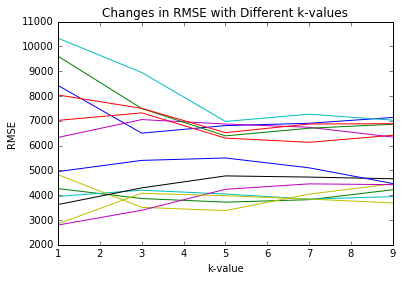

In [102]:
t.plot(legend = False)
plt.xlabel('k-value')
plt.ylabel('RMSE')
plt.title('Changes in RMSE with Different k-values')

There is a significant drop in RMSE for most of the variables with k-value equels to 5

### Multivariate Model

In [106]:
#function with 4 parameters - training column names, target column name, and the dataframe object, and k
def knn_train_test_multi(tr,tar,df,k):
    
     # Randomize order of rows in data frame.
    np.random.seed(1)
    shuffled_index = np.random.permutation(df.index)
    df = df.reindex(shuffled_index)
    
    #dividind data set 75/25 %
    x = int(round(len(df)*0.75,0))
    train = df.iloc[:x,:]
    test = df.iloc[x:,:]
    
    RMSE = [] 
    for i in k: 
        # model instance
        knn = KNeighborsRegressor(n_neighbors = i)

        # fitting model with given column and target
        knn.fit(train[tr],train[tar])

        #prediction and MSE calculation
        predict = knn.predict(test[tr])
        mse = mean_squared_error(predict,test[tar])
        RMSE.append(mse**0.5)
    
    # return RMSE
    return RMSE

In [107]:
# variation of RMSE with different number of variables
d = {}
d['two_values'] = knn_train_test_multi(['highway-mpg', 
                                        'city-mpg'],'price', n_cars,[5])
d['three_values'] = knn_train_test_multi(['highway-mpg',
                                          'city-mpg','width'],'price', n_cars,[5])
d['four_values'] = knn_train_test_multi(['highway-mpg', 'city-mpg',
                                         'width', 'curb-weight'],'price', n_cars,[5])
d['five_values'] = knn_train_test_multi(['highway-mpg', 'city-mpg',
                                         'width', 'wheel-base',
                                        'curb-weight'],'price', n_cars,[5])
d

{'five_values': [2710.3119225653713],
 'four_values': [2532.212229178273],
 'three_values': [3264.09291889799],
 'two_values': [3745.350588022435]}

The best model is four_values

### Hyperparameter Tuning

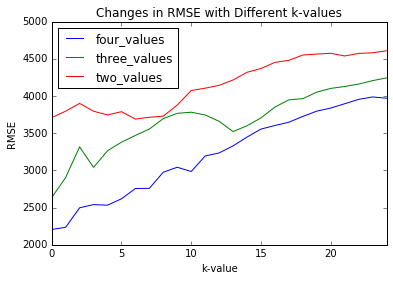

In [112]:
k = [x for x in range(1,26)]
d = {}
d['two_values'] = knn_train_test_multi(['highway-mpg',
                                       'city-mpg'],'price', n_cars,k)
d['three_values'] = knn_train_test_multi(['highway-mpg',
                                          'city-mpg','width'],'price', n_cars,k)
d['four_values'] = knn_train_test_multi(['highway-mpg', 'city-mpg',
                                         'width', 'curb-weight'],'price', n_cars,k)

# plotting changing in RMSE values with k-values
t = pd.DataFrame(d)
t.plot()
plt.xlabel('k-value')
plt.ylabel('RMSE')
plt.title('Changes in RMSE with Different k-values')

With increase in k-value RMSE is getting higher. 